<a href="https://colab.research.google.com/github/ValentinVignal/HDStyleTransfert/blob/src/style_transfert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HD Style transfert

## Utilisation

1. Create 1 folders on your computer names *content* and *style*
2. Put the corresponding images in it
3. Creat 2 `.zip` files: `content.zip` and `style.zip`
4. Import them in the session (column on the left)
5. Run everything

## What it does

It does all the combinaison of the content and style files and do the style transfert. It saves everything in the folder *results* with the architecture:
```bash
results/
 |- content_image_name1/
 |  |- style_image_name1/
 |  |  |- n_step.png          # The style transfered image at the step n
 |  |  |- 2n_step.png
 |  |  |- ...
 |  |- style_image_name2/
 |  |  |- n_step.png
 |  |  |- 2n_step.png
 |  |  |- ...
 |  |- ...
 |- content_image_name2/
 |  |- style_image_name1/
 |  |  |- n_step.png
 |  |  |- 2n_step.png
 |  |  |- ...
 |  |- style_image_name2/
 |  |  |- n_step.png
 |  |  |- 2n_step.png
 |  |  |- ...
 |  |- ...
 |- ...

```

## To keep the environment connected

1. Press `Ctrl` + ` Shift` + `i`
2. Go to *Console*
3. Paste these lines:
  ```javascript
  function ClickConnect(){
    console.log("Working"); 
    document.querySelector("colab-toolbar-button#connect").click(); 
  }
  setInterval(ClickConnect,60000);
  ```
4. Press `Enter`



# Setup

In [1]:
# Install tensorflow
try:
  # %tensroflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.test.gpu_device_name())
print('tf version', tf.__version__)

/device:GPU:0
tf version 2.2.0


In [2]:
# Clone the github repo
!git init
!git clone https://github.com/ValentinVignal/HDStyleTransfert.git
# Go in it
%cd HDStyleTransfert/

Initialized empty Git repository in /content/.git/
Cloning into 'HDStyleTransfert'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 168 (delta 92), reused 77 (delta 36), pack-reused 0
Receiving objects: 100% (168/168), 3.56 MiB | 11.50 MiB/s, done.
Resolving deltas: 100% (92/92), done.
/content/HDStyleTransfert


In [3]:
# Install dependencies except tensorflow
%pip install $(grep -ivE "tensorflow|Pillow|ipython" requirements.txt)

In [0]:
%matplotlib inline

In [0]:
# !rm -r results
# !git pull

# Parameters

In [0]:
all_images = True     # To do all the combinaisons of the images

# Run

Combination 11/12 ( 92%) [--------------------------------------------->    ] ETA 0:04:49


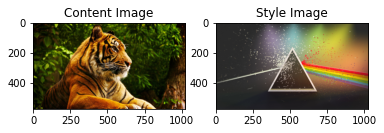

Epoch 0/5 (  0%) [.                   ] ETA -:--:--
Step 5/5 (100%) [....................] Time 0:00:53


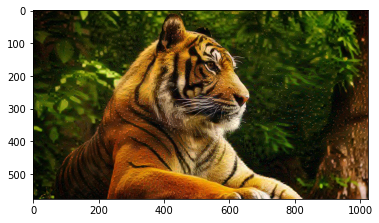

Epoch 1/5 ( 20%) [.....               ] ETA 0:03:38
Step 10/10 (100%) [....................] Time 0:00:31


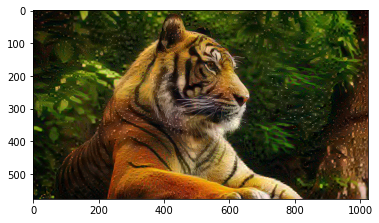

Epoch 2/5 ( 40%) [.........           ] ETA 0:02:09
Step 15/15 (100%) [....................] Time 0:00:47


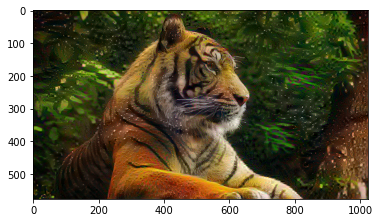

Epoch 3/5 ( 60%) [.............       ] ETA 0:01:31
Step 20/20 (100%) [....................] Time 0:01:02


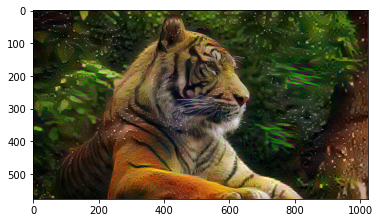

Epoch 4/5 ( 80%) [.................   ] ETA 0:00:54
Step 25/25 (100%) [....................] Time 0:01:18


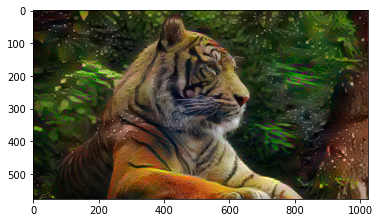

Epoch 5/5 (100%) [....................] Time 0:04:36
Combination 12/12 (100%) [--------------------------------------------------] Time 1:01:50


<Figure size 432x288 with 0 Axes>

In [7]:
import os
from epicpath import EPath
import src
from loadbar import RainbowBar
import IPython.display as display

content_path_list, style_path_list = src.data.extract_data()
num_content = len(content_path_list)
num_style = len(style_path_list)
nb_combinations = num_content * num_style
print(f'{nb_combinations} combinations ({num_content} contents and {num_style} styles)')
bar = RainbowBar( max=nb_combinations, size=50, head='>', body='-', title='Combination')
bar.start()
for i in range(num_content * num_style):
  if i > 0: display.clear_output(wait=True)
  # I launch a different process to solve the leak memory issue in tensorflow.
  # When the process is finished, at least everything about this one is cleaned and I can start again peacefully
  # and there is no memory issue anymore :)
  bar.update(step=i, end='\n')
  %run style_transfert.py
  if not all_images:
    # Do only one image
    break
bar.end()

# Save and download

In [8]:
# Zip it
!zip -r results.zip results

  adding: results/ (stored 0%)
  adding: results/astronaut/ (stored 0%)
  adding: results/astronaut/surface pro/ (stored 0%)
  adding: results/astronaut/surface pro/step_15.png (deflated 0%)
  adding: results/astronaut/surface pro/step_75.png (deflated 0%)
  adding: results/astronaut/surface pro/step_30.png (deflated 0%)
  adding: results/astronaut/surface pro/step_5.png (deflated 0%)
  adding: results/astronaut/surface pro/step_50.png (deflated 0%)
  adding: results/astronaut/earth/ (stored 0%)
  adding: results/astronaut/earth/step_15.png (deflated 0%)
  adding: results/astronaut/earth/step_75.png (deflated 0%)
  adding: results/astronaut/earth/step_30.png (deflated 0%)
  adding: results/astronaut/earth/step_5.png (deflated 0%)
  adding: results/astronaut/earth/step_50.png (deflated 0%)
  adding: results/astronaut/pink floyd/ (stored 0%)
  adding: results/astronaut/pink floyd/step_15.png (deflated 0%)
  adding: results/astronaut/pink floyd/step_75.png (deflated 0%)
  adding: results/

In [0]:
# Download it
from google.colab import files


is_downloaded = False
i = 0
while not is_downloaded:
  try:
    files.download('results.zip')
    is_downloaded = True
  except Exception as e:
    i += 1
    print(i, e)
  if i == 100:
    print('Could not download')
    break

End :)